# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

ЦЕЛЬ ИССЛЕДОВАНИЯ:
- Очистить данные от дубликатов, заполнить пропуски
- Привести данные к нужным типам (с пояснением выбора типа).
- Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Убираем редкие и выбивающиеся значения. Описываем, какие особенности обнаружили.
- Анализируем:Какие факторы больше всего влияют на стоимость квартиры? Изучаем, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучаем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучаем зависимость от даты размещения: дня недели, месяца и года.
- Изучаем время продажи квартиры. Строим гистограмму. Считаем среднее и медиану. Описываем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Изучаем квартиры в Санкт-Петербурге с помощью столбца locality_name и вычисляем среднюю цену каждого километра
- Определить цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений,посчитать цену за км от центра Санкт-Петербурга.

ПРАН РАБОТ:
   - Определяем и изучаем пропущенные значения,проверяем на дубликаты и меняем тип данных при необходимости
   - Проверяем категории на предмет выбросов
   - При необходимости расширить таблицу с данными,добавив новые столбцы и внести в них информацию необходимаую для последующего анализа  
   - Провести исселдование данных на предмет корреляций. основная цель опередлить от чего зависит цена 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span><ul class="toc-item"><li><span><a href="#После-загрузки-базы-просматриваем-первые-десять-строк." data-toc-modified-id="После-загрузки-базы-просматриваем-первые-десять-строк.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>После загрузки базы просматриваем первые десять строк.</a></span></li><li><span><a href="#Методом-info-рассмотрим-в-каком-виде-внесены-данные" data-toc-modified-id="Методом-info-рассмотрим-в-каком-виде-внесены-данные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Методом info рассмотрим в каком виде внесены данные</a></span></li><li><span><a href="#Построим-гистограммы-всех-категорий" data-toc-modified-id="Построим-гистограммы-всех-категорий-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Построим гистограммы всех категорий</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проведем-исследование-базы-на-предмет-пропущенных-значений." data-toc-modified-id="Проведем-исследование-базы-на-предмет-пропущенных-значений.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проведем исследование базы на предмет пропущенных значений.</a></span></li><li><span><a href="#Заполнение-пропусков." data-toc-modified-id="Заполнение-пропусков.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Заполнение пропусков.</a></span></li><li><span><a href="#Изменение-данных" data-toc-modified-id="Изменение-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение данных</a></span></li><li><span><a href="#Ищем-неявные-дубликаты" data-toc-modified-id="Ищем-неявные-дубликаты-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ищем неявные дубликаты</a></span></li><li><span><a href="#Меняю-найденные-дубликаты" data-toc-modified-id="Меняю-найденные-дубликаты-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Меняю найденные дубликаты</a></span></li><li><span><a href="#Проверим-данные-на-отклонения" data-toc-modified-id="Проверим-данные-на-отклонения-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Проверим данные на отклонения</a></span></li><li><span><a href="#Проверяю-&quot;выбивающиеся-значения&quot;" data-toc-modified-id="Проверяю-&quot;выбивающиеся-значения&quot;-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Проверяю "выбивающиеся значения"</a></span></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span><ul class="toc-item"><li><span><a href="#Рассчитаем-и-добаим-столбец-с-ценой-за-квадратный-метр." data-toc-modified-id="Рассчитаем-и-добаим-столбец-с-ценой-за-квадратный-метр.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Рассчитаем и добаим столбец с ценой за квадратный метр.</a></span></li><li><span><a href="#Добавляем-день-публикации" data-toc-modified-id="Добавляем-день-публикации-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Добавляем день публикации</a></span></li><li><span><a href="#Добавляем-месяц" data-toc-modified-id="Добавляем-месяц-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Добавляем месяц</a></span></li><li><span><a href="#Здесь-год" data-toc-modified-id="Здесь-год-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Здесь год</a></span></li><li><span><a href="#Тип-этажа" data-toc-modified-id="Тип-этажа-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Тип этажа</a></span></li><li><span><a href="#Меняем-значение-расстояния-до-центра-в-из-метров-в-километры" data-toc-modified-id="Меняем-значение-расстояния-до-центра-в-из-метров-в-километры-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Меняем значение расстояния до центра в из метров в километры</a></span></li></ul></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров" data-toc-modified-id="Изучение-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров</a></span></li><li><span><a href="#Изучим-скорость-продаж" data-toc-modified-id="Изучим-скорость-продаж-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучим скорость продаж</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта?" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Какие факторы больше всего влияют на общую (полную) стоимость объекта?</a></span></li><li><span><a href="#Средняя-цена-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений" data-toc-modified-id="Средняя-цена-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</a></span></li><li><span><a href="#Cредняя-цена-каждого-километра." data-toc-modified-id="Cредняя-цена-каждого-километра.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Cредняя цена каждого километра.</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import warnings

warnings.filterwarnings("ignore")

Импортирую pandas для работы с данными

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')

### После загрузки базы просматриваем первые десять строк.

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


На первый взгляд наблюдается большое кол-во NAN. Проверим методом info и также посмотрим на типы данных

### Методом info рассмотрим в каком виде внесены данные

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Есть 2 стороки с булевыми значениями, 14 с плавающей точкой, 3 целочисленные, 3 вещественные

### Построим гистограммы всех категорий

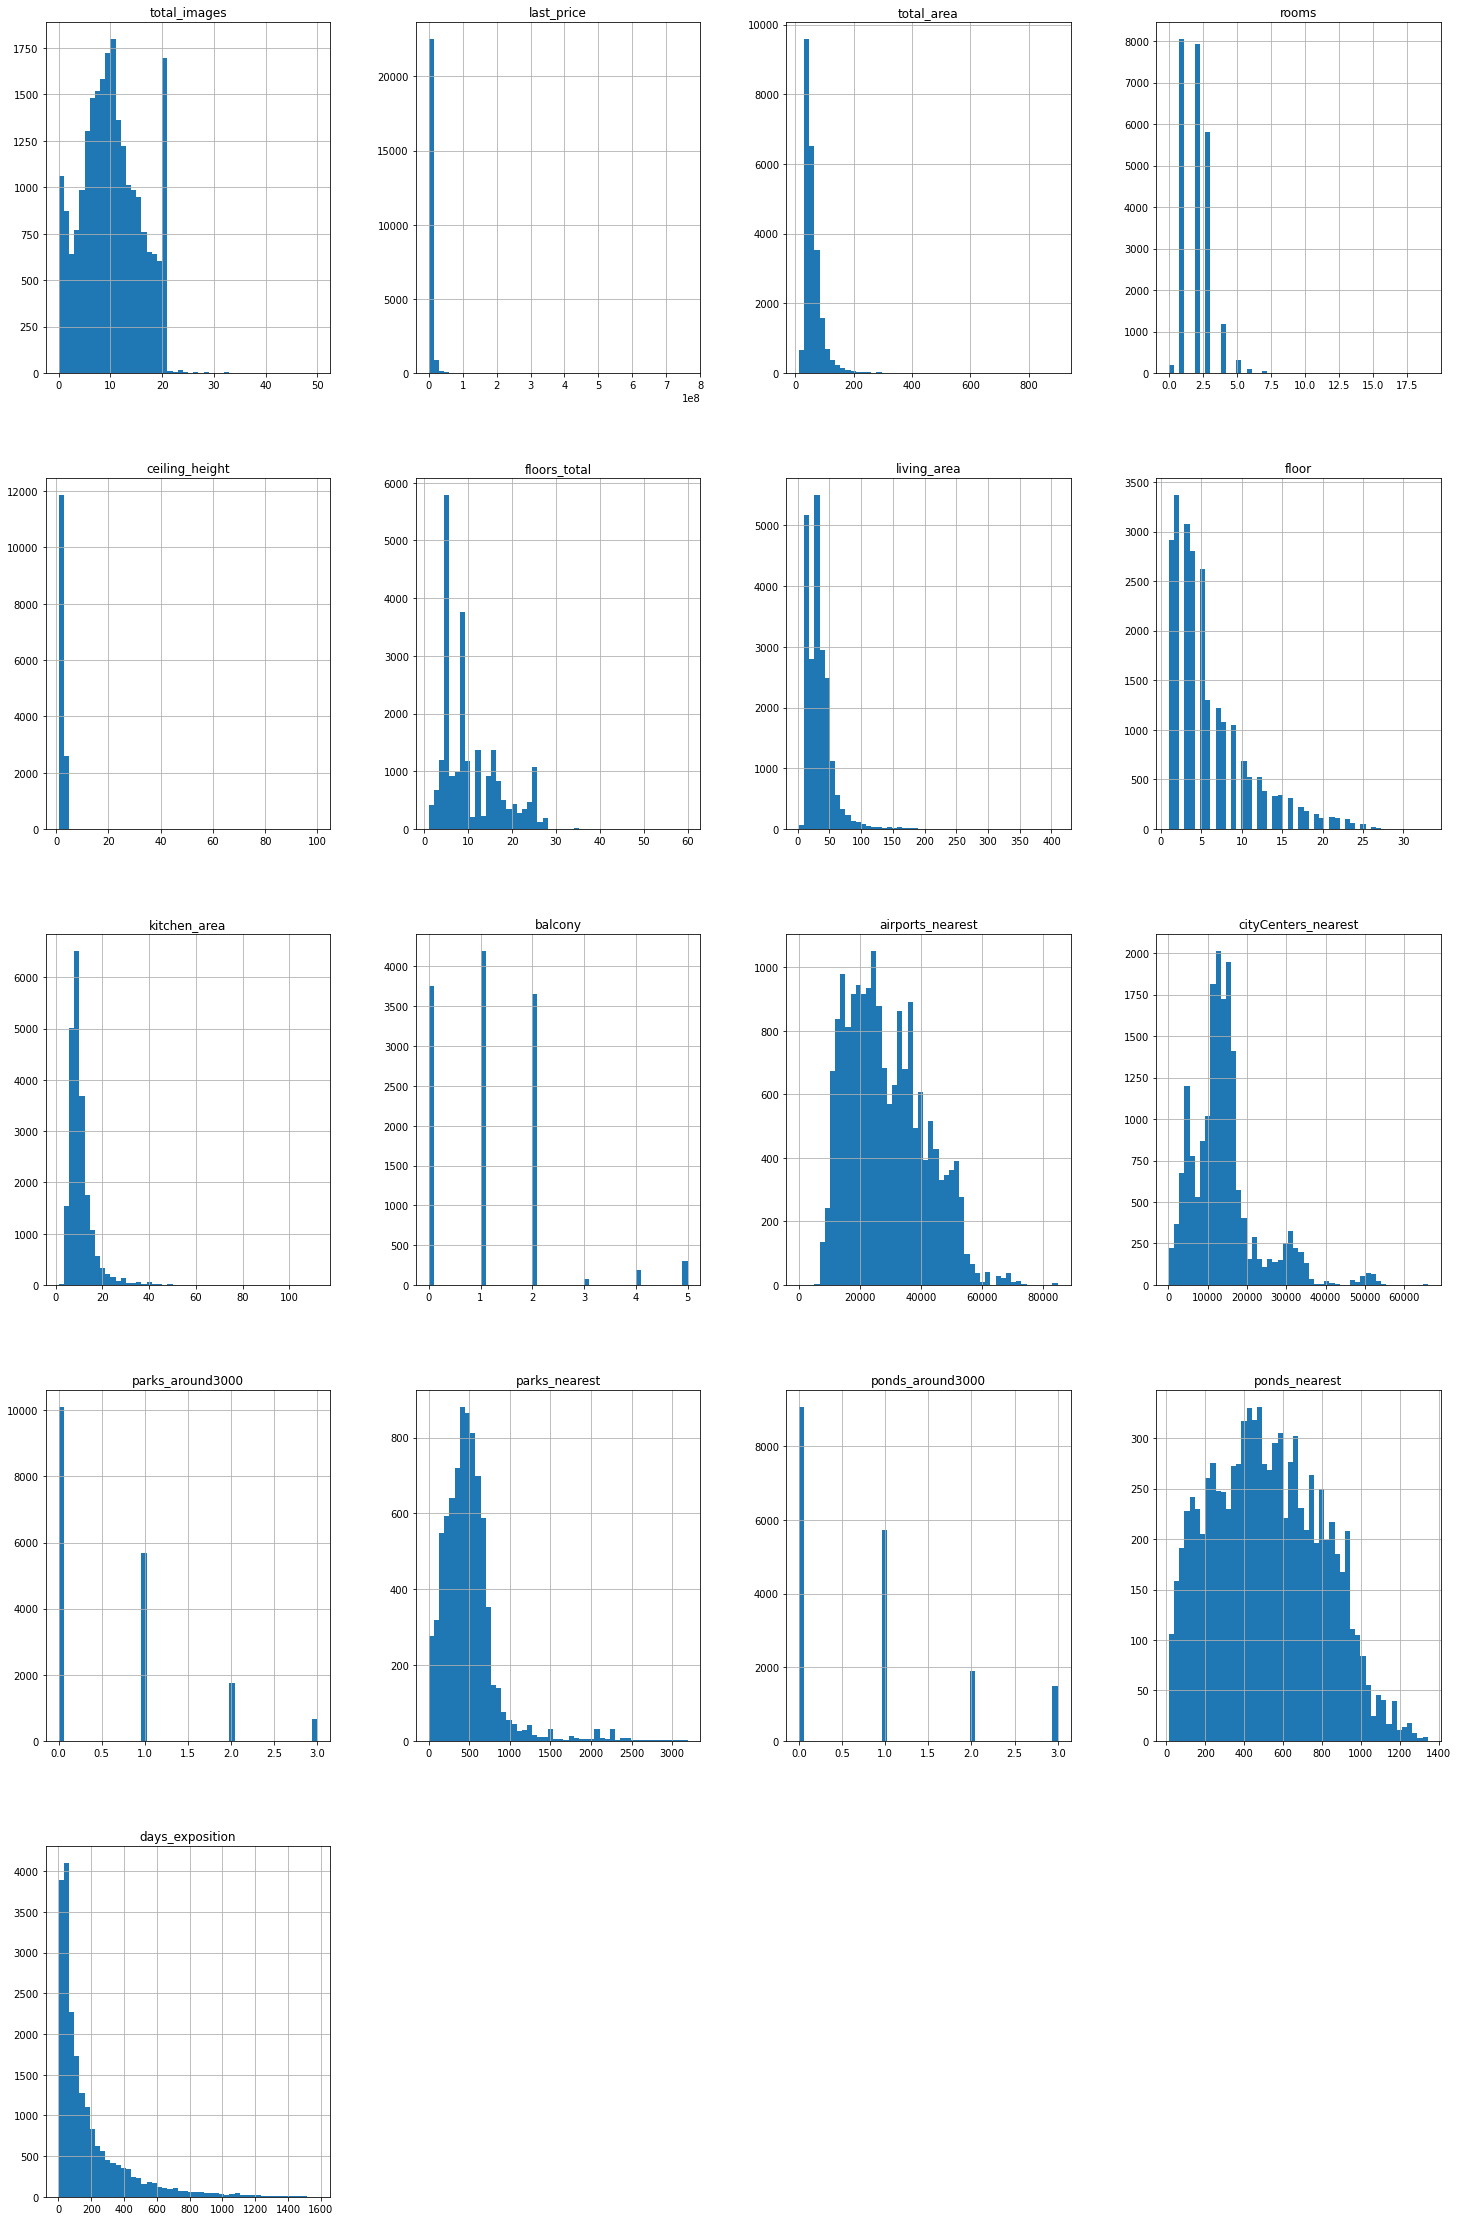

In [5]:
data.hist(figsize=(25, 40),bins=50);

Есть наравномерно распредленные значения такие как floors_total,cityCenters_nearest,airports_nearest. Далее будем их рассматривать.

## Предобработка данных

### Проведем исследование базы на предмет пропущенных значений. 
Первым проверяю абсолютное значение методом sum(). 
Вторым методом mean() смотрю часть пропусков относительно всех значений в каждой категории

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


Обнаружено недопустимо большое(>20%) кол-во пропусков в категориях:

- ceiling_height 38.8%
  - возможная причнина: возможно некоторые владельцы квартир считают данную информацию неважной, поэтому не указывают ее в объявлении, оценивают на глаз и приводят к общему знаменателю,что их потолки "стандартные" поэтому пропускают информацию или просто не знают и исходят из тойже логики.Также нельзя исключать ошибки в заполнении данных или тех. ошибки при выгрузке. Далее будем думать на что поменять пропуски.
  
- is_apartment 88.3%
  - возможная причнина: трудно определить,из-за отсутствия в открытых источних соотношения апартаментов к квартирам, но есть ощущение, что апартаменты представлены в меньшем объеме на рынке недвижимости.Также это относительно новый вид недвижимости представленный на рынке и в основном появляется в новых домах.Наверное в текущих данных представлены в основном старые фонды,когда паратаменты массово не застраивались.Поэтому переведу в булево значение.
  
- balcony 48.6%
  - возможная причнина:здесь отсутствие балконов в квартирах,поэтому заменим на 0
  
- airports_nearest 23.4%  
- cityCenters_nearest 23.3%
- parks_around3000 23.3%
- ponds_around3000 23.3%
  - Видно что значение пропусков одинаковое 23.3%.Данные заполняла система и я вижу здесь причину в технической ошибке или поиск системой объектов в определенном радиусе и ввиду их отсутствия выставила пропуски. Думаю данные пропуски оставить.

- parks_nearest 65.9%
- ponds_nearest 61.6%
  - возможная причнина:реальное отсутствие парков и водоемов в шаговой доступности.Также оставим данные без изменений

Вывод: данные досточно "грязные", будем корректировать.

### Заполнение пропусков.

Для начала заполним пропуски, где их меньше 20%, что не должно повлиять на дальнейшее исследование.
- kitchen_area 9,6% - заполним медианным значением
- floors_total 0,4% - заполним медианным значением
- living_area 8% - заполним медианным значением
- locality_name 0,2% - очень малое значаение. Удалим, это не должно повлиять на исследование.
- days_exposition 13.4% - важный показатель, но кол-во пропусков допускает изменение на медиану


In [8]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data = data.dropna(subset=['locality_name'])

Данные которые заменим:
- balcony - заменим на 0 (отсутствие балконов)


In [9]:
data['balcony'] = data['balcony'].fillna(0)

 - ceiling_height - заполним данные пропуски медианным значением по каждому населенному пункты. Считаю это будет более репрезентаивно.

In [10]:
#data['ceiling_height'] = data['ceiling_height'].fillna(0)

#/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: 
#RuntimeWarning: Mean of empty slice return np.nanmean(a, axis, out=out, keepdims=keepdims)

for t in data['locality_name'].unique():
        data.loc[(data['locality_name'] == t) & (data['ceiling_height'].isnull()),'ceiling_height'] = \
        (data.loc[(data['locality_name'] == t),'ceiling_height'].median())

        
data['ceiling_height'].isna().sum() #провери кол-во отсавшихся пропусков


121

Осталось всего 104, с этим можно работать

In [11]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,0.5
floors_total,0.0
living_area,0.0
floor,0.0
is_apartment,88.3


### Изменение данных

- Часть данных для анализа лучше изменить для удобного использования:
  - floors_total - float to int - этажи не согут иметь десятичные значения
  - is_apartment - obj to bool - здесь так как всего два значения
  - balcony - float to int - кол-во балконов также не могут иметь десятичные значения
  - days_exposition - float to int - кол-во дней указано целыми числами

In [12]:
bin_cols = ['is_apartment']
num_cols = ['floors_total','balcony']

In [13]:
for col in bin_cols:
    data[col] = data[col].astype('bool')
for col in num_cols:  
    data[col] = data[col].astype('int')

### Ищем неявные дубликаты

In [14]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Кол-во дубликатов достаточно сложно определить, так как два населенных пункта с одним и тем же названием могут, но разным типом деревня/поселок могут действительно быть два разных населенных пункта. Сделаем минимальное изменение , чтобы избежать гарантированно некоторых повторений заменим букву в слове посёлок на "е".

### Меняю найденные дубликаты

In [15]:
data['locality_name'] = data['locality_name'].str.replace('посё','посе',)

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

### Проверим данные на отклонения

In [17]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23529.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,23650.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.733949,10.669852,34.091359,5.893277,10.425715,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,169.222748
std,5.682278,1.089640e+07,35.661808,1.078620,1.012964,6.583725,21.169359,4.883317,5.628088,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,206.550577
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.300000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,41.037500,8.000000,11.427500,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


наблюдаются выбросы в болшую сторону(max) в столбцах:
- ceiling_height
- rooms 
- total_area
- living area

в столбце last_price слишком большие значения,разделим на 100000 и посмотрим распредление

In [18]:
data['last_price'] = data.last_price / 100000
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,23650.000000,23650.000000,23650.000000,23529.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,23650.000000
mean,9.862326,65.411269,60.329069,2.070106,2.733949,10.669852,34.091359,5.893277,10.425715,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,169.222748
std,5.682278,108.963992,35.661808,1.078620,1.012964,6.583725,21.169359,4.883317,5.628088,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,206.550577
min,0.000000,0.121900,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,34.000000,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.300000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,46.500000,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,67.990000,69.700000,3.000000,2.700000,16.000000,41.037500,8.000000,11.427500,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7630.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Также last_price наблюдаются экстремумы выбивающиеся из ряда

### Проверяю "выбивающиеся значения"

- ceiling_height

(1.0, 5.0)

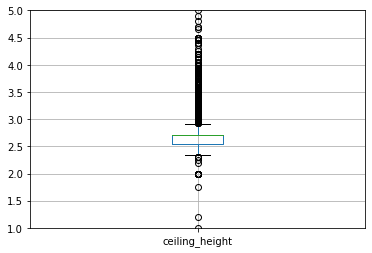

In [19]:
data.boxplot(column=['ceiling_height']);
plt.ylim((1,5))

Большое кол-во выбросов высота потолков.Данные могли быть внесены некорректно.Есть выброс равный даже 100, уберем его и разделим величины больше 10 м на 10.

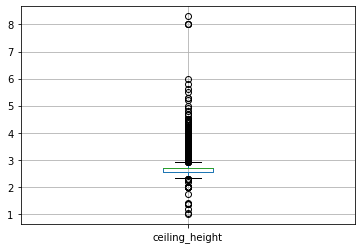

In [20]:
data = data[data['ceiling_height'] != 100]
data.loc[data['ceiling_height']>10, 'ceiling_height'] = data.loc[data['ceiling_height']>10, 'ceiling_height'] / 10
data.boxplot(column=['ceiling_height']);

Даже в этом случае выбросов достаточно много.Попробуем сделать срез от 2 до 3 метров и посмотрим какую долю занимает кол-во выбросов.

In [21]:
data_height = data.query('2 <= ceiling_height <= 3')
(data['ceiling_height'].count() - data_height['ceiling_height'].count())/ data['ceiling_height'].count()


0.064816388983339

Около 6 % выбросов.думаю можно убрать данные выбросы и посмотреть на распределение.

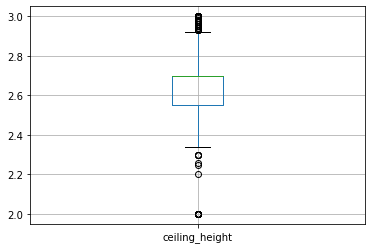

In [22]:
data = data.query('2 <= ceiling_height <= 3')
data.boxplot(column=['ceiling_height']);

In [23]:
# Код ревьюера

low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = data['last_price'].quantile(low_percentele)
last_price_high = data['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Нижняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@last_price_low <= last_price <= @last_price_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 10.5
Нижняя граница last_price 274.98399999999964
Процент отброшенных значений =  1.95 %


Уже лучше, несмотря на оставшиеся выбросы, думаю оставить чтобы не сокращать базы для анализа

ВЫВОД: В данных по высоте потолков присутствуют большое ко-во ошибок, думаю что это произошло при внесении данных .Значения были сильно завышены,проведена коррекция и удалены  не характерные значения выше 3 метров

- rooms

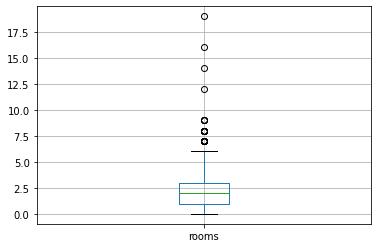

In [24]:
data.boxplot(column=['rooms']);

Есть квартиры с очень большим кол-вом комнат. Думаю это зависит от площади. Проверим с условием что комнат в квартире больше или равно 2, так как логично предполождить, что кол-во комнат должно расти с ростом площади.

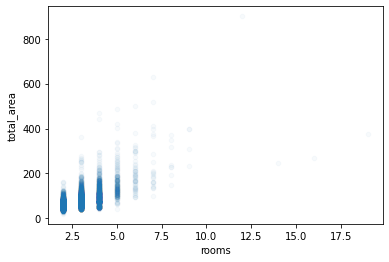

In [25]:
data.query('rooms >= 2').sort_values('rooms').plot(x='rooms', y='total_area',kind='scatter',alpha=0.03);

Корреляция прослеживатеся, но у нас до сих пор есть недвижимость с малой площадью но большим кол-вом комнат, что кажется нелогичным.

In [26]:
data.groupby('rooms')['total_area'].count()

rooms
0      187
1     7851
2     7450
3     5280
4      938
5      200
6       57
7       24
8        8
9        4
12       1
14       1
16       1
19       1
Name: total_area, dtype: int64

Так и есть, наблюдается даже квартиры с 0 кол-вом комнат, но можно предположить, что это студии.Удалим квартиры с большим кол-вом комнат представленные в малом кол-ве для выборки они не информативны.

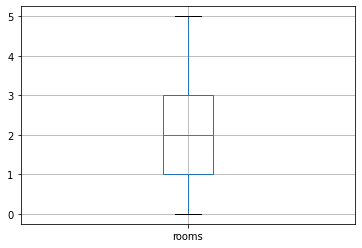

In [27]:
data = data.query('0 <= rooms <= 5')
data.boxplot(column=['rooms']);

ВЫВОД: На рынке в основном представлены квартиры с площадью до 200 кв.метров и до 5 комнат.Квартиры от 6 комнат были удалены,так они представлены в меньшем объеме и помогут провести анализ.

- total_area

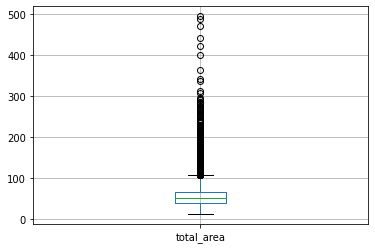

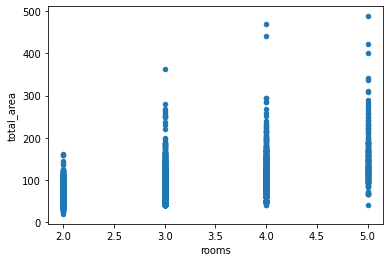

In [28]:
data.boxplot(column=['total_area']);
data.query('rooms >= 2').sort_values('rooms').plot(x='rooms', y='total_area',kind='scatter');

ВЫВОД:Здесь также наблюдается большое кол-во выборосов в большую сторону, но проводить корректировки думаю не стоит, так как периодические предлоджение крупной площади выглядет логично.

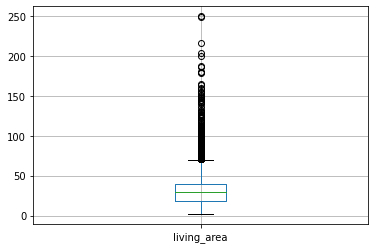

In [29]:
data.boxplot(column=['living_area']);

ВЫВОД:Жилая площадь растет, что логично с учетом роста предложения с большей площадью

- last_price

count    21906.000000
mean        57.508351
std         64.239365
min          0.121900
25%         33.850000
50%         45.000000
75%         63.000000
max       4013.000000
Name: last_price, dtype: float64

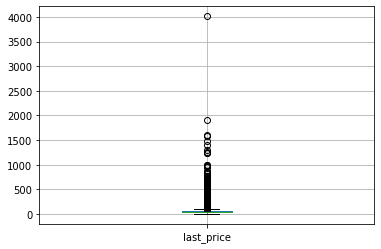

In [30]:
data.boxplot(column=['last_price']);
data['last_price'].describe()

Есть выброс около 4000. Скорректируем данные, уберем только один выборс самый выскоий выброс,остальное оставим, так цена имеет при вязку к размеру площади, которую мы не меняли.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11,18.6,1,True,...,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.3,4,True,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14,30.0,9,True,...,9.1,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.60,12,14.4,5,True,...,9.1,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


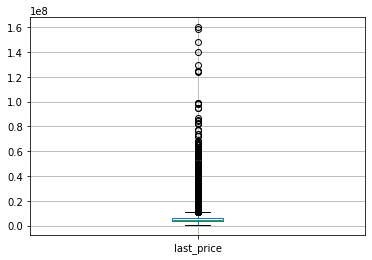

In [31]:
data = data.query('last_price > 1 and last_price <= 1800')
data['last_price'] = data.last_price * 100000 
data.boxplot(column=['last_price']);
data.head()

Скорректировали часть выборосов данные должны быть более упорядочены. Далее проверим при постороении гистограмм и проведения рассчетов

ОБЩИЙ ВЫВОД:В данных присутствовали выбросы, причина которых могла быть в неверном заполнении данных, таких как "высота потолков", так и в слишком редких, но высоких значениях "цена","общая площадь". Данные скорректировали, теперь можно более корректно провести исследование.

## Посчитайте и добавьте в таблицу новые столбцы

### Рассчитаем и добавим столбец с ценой за квадратный метр.

In [32]:
data['price'] = (data['last_price'] / data['total_area'])

### Добавляем день публикации

In [33]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday'] = data['first_day_exposition'].dt.weekday 

### Добавляем месяц

In [34]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

### Здесь год

In [35]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

### Тип этажа

In [36]:
def floor_type (row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [37]:
data['floor_type'] = data.apply(floor_type,axis=1) 

### Меняем значение расстояния до центра в из метров в километры

In [38]:
data['cityCenters_nearest'] = round((data['cityCenters_nearest'] / 1000),0)

## Проведите исследовательский анализ данных

### Изучение параметров

- ОБЩАЯ ПЛОЩАДЬ

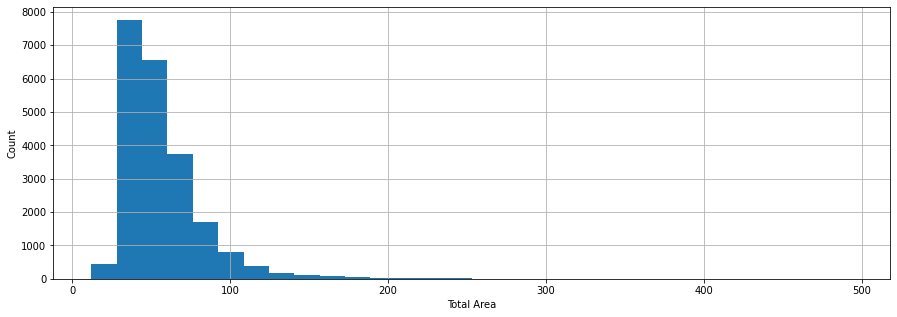

In [39]:
data['total_area'].hist(figsize=(15,5), bins = 30);

plt.xlabel('Total Area')
plt.ylabel('Count')
plt.show()


Основное распределение площади в диапазаоне от 30 до 70. Выглядит как нормальное распределение. Данный диапазон метража достаточно часто встречается на рынке,это однокомнатные и двукомнатыне квартиры, которые занимают большую часть большинства домов.Отклонение в диапазон выше 70 уже говорят в пользу не только больших многокомнатных квартир, но загородных домов.

- ЖИЛАЯ ПЛОЩАДЬ

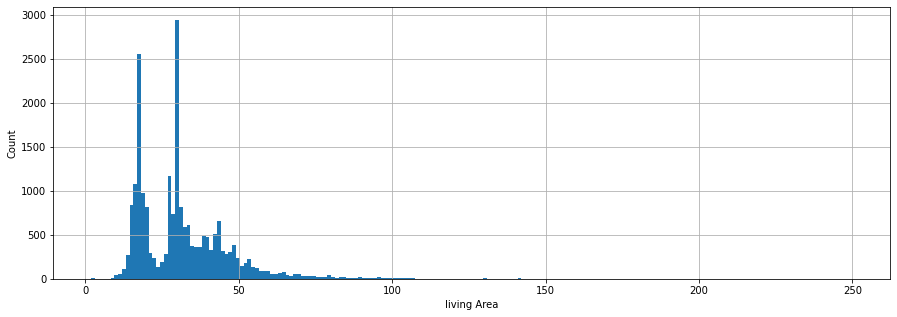

In [40]:
data['living_area'].hist(figsize=(15,5), bins = 200);

plt.xlabel('living Area')
plt.ylabel('Count')
plt.show()


Есть необычный провал при распределении. Интресно посмотреть, как это соотносится с общей площадью.

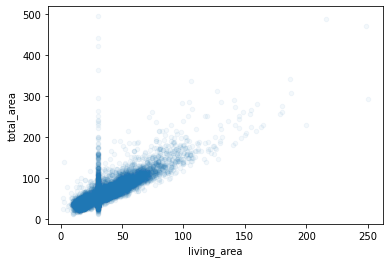

In [41]:
data.plot(x='living_area', y='total_area',kind='scatter',alpha=0.05);

Видно, что не смотря на рост общей площади размер жилой площади не меняется.Трудно сказть с чем это связано.Возможно ошибки при заполнении.

- КУХОННАЯ ПЛОЩАДЬ

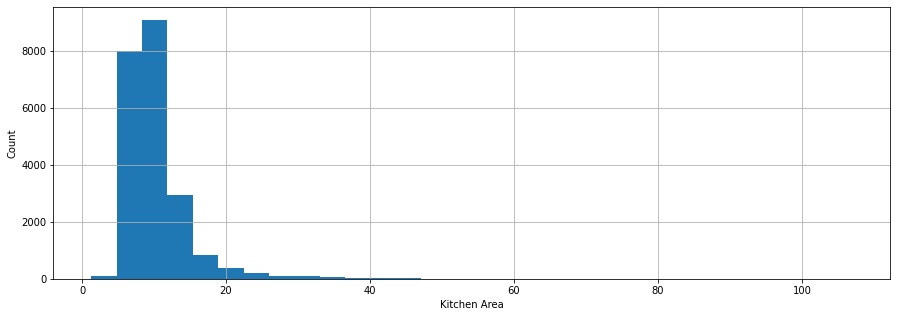

In [42]:
data['kitchen_area'].hist(figsize=(15,5), bins = 30);

plt.xlabel('Kitchen Area')
plt.ylabel('Count')
plt.show()

Основное распределение жилой площади в диапазаоне от 5 до 15. Выглядит логично,средний размер кухни с учетом, что популярные квартры в подборке одно/двухкомнатные квартиры.

- ЦЕНА

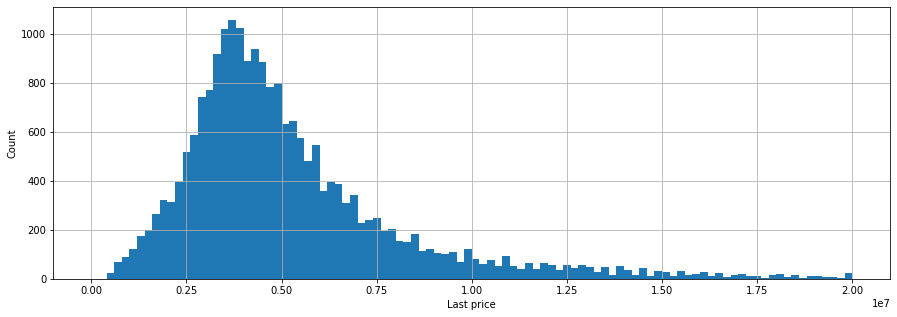

In [43]:
data['last_price'].hist(range=(0,20000000),figsize=(15,5), bins = 100,);

plt.xlabel('Last price')
plt.ylabel('Count')
plt.show()

Цены распределены нормально. Здесь не наблюдаю аномалий.

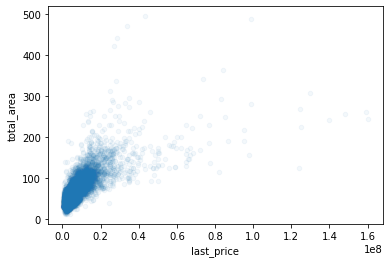

In [44]:
data.plot(x='last_price', y='total_area',kind='scatter',alpha=0.05);

Также корреляция между ценой и общей площадью выглядит нормой.

- КОМНАТЫ

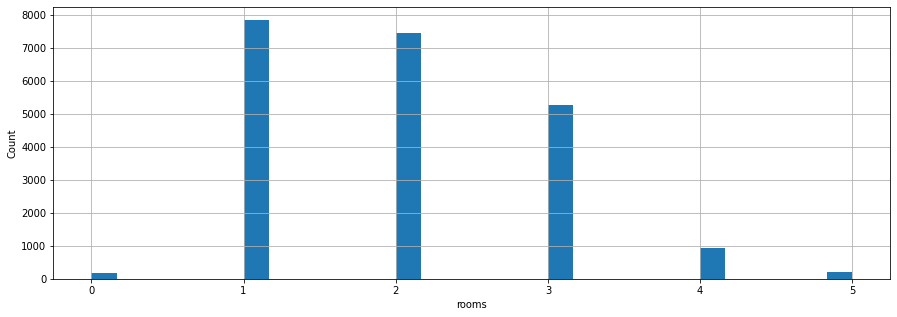

In [45]:
data['rooms'].hist(figsize=(15,5), bins = 30);

plt.xlabel('rooms')
plt.ylabel('Count')
plt.show()

На рынке в основном представлены однокомнатные и двухкомнатные квартиры,что соотносится с ранее рассмотренным показателем общей площади.

- ВЫСОТА ПОТОЛКОВ

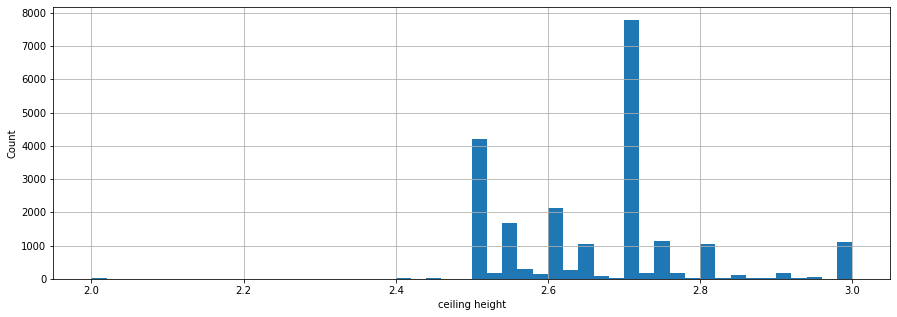

In [46]:
data['ceiling_height'].hist(figsize=(15,5), bins = 50);

plt.xlabel('ceiling height')
plt.ylabel('Count')
plt.show()

Распределение неравномерно, имеются провалы. Такое можно объяснить стандартами в строительстве 2.5 и 2.7 самые распространенная высота потолков.

Сегодня минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра.(https://stone-floor.ru/stati/optimalnaya-visota-potolka#:~:text=Сегодня%20минимальной%20нормой%20в%20России,показатель%20может%20превышать%203%20метра.)

- ЭТАЖ

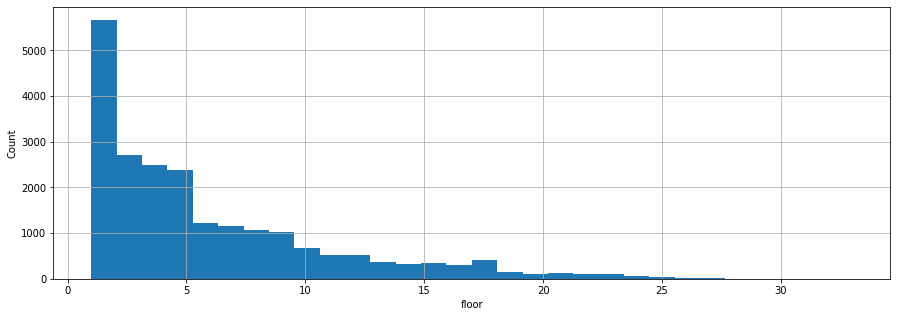

In [47]:
data['floor'].hist(figsize=(15,5), bins = 30);

plt.xlabel('floor')
plt.ylabel('Count')
plt.show()

Большее кол-во предлагается на первых 5 этажах. Здесь можно предположить, что так как база охватывает не только крупные города, но и поселки мы видим больше предложений в малоэтажных домах.

- ТИП ЭТАЖА

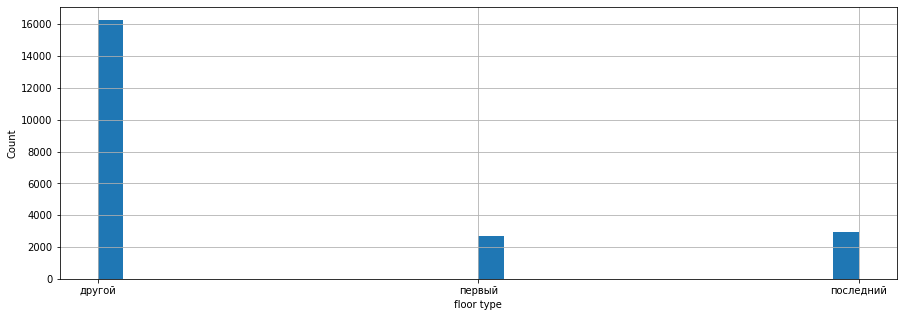

In [48]:
data['floor_type'].hist(figsize=(15,5), bins = 30);

plt.xlabel('floor type')
plt.ylabel('Count')
plt.show()

Наблюдение:первый и последние этажи встречаются меньше всего

- ОБЩЕЕ КОЛ-ВО ЭТАЖЕЙ

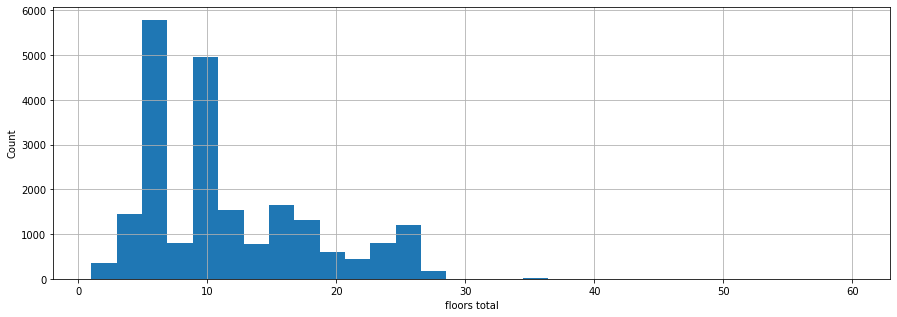

In [49]:
data['floors_total'].hist(figsize=(15,5), bins = 30);

plt.xlabel('floors total')
plt.ylabel('Count')
plt.show()

Наблюдение:встречаются чаще 5-7 этажные дома и 9-11 этажные дома. Соотносится с выводом, что часто встречаются малоэтажки,но лишь отчасти.Дома 9-11 этажей, могут указывать на советсую застройку, такае высота домов типична для 70-х,80-х годов.

- УДАЛЕННОСТЬ ОТ ЦЕНТРА

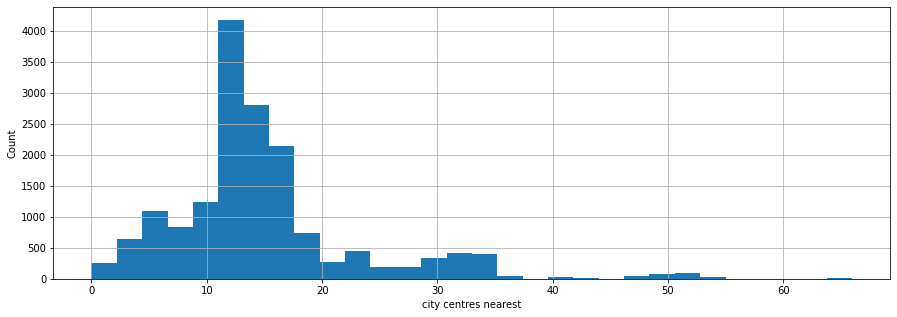

In [50]:
data['cityCenters_nearest'].hist(figsize=(15,5), bins = 30);

plt.xlabel('city centres nearest')
plt.ylabel('Count')
plt.show()

Удаленность от центра находится в дипазоне от 12 до 17 км. Можно сказать, что основное предложение идетиз области.

- БЛИЖАЙШИЙ АЭРОПОРТ

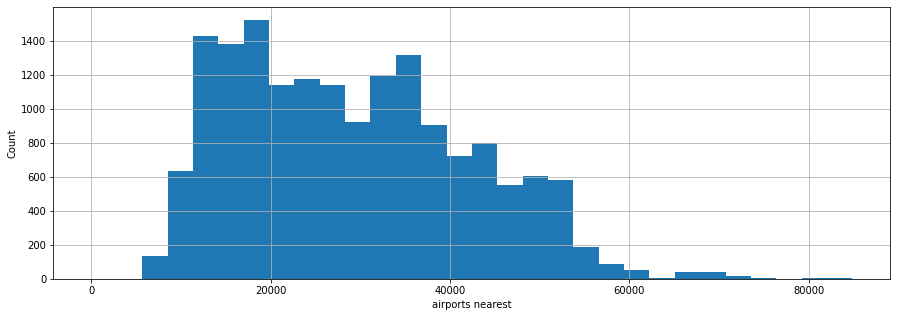

In [51]:
data['airports_nearest'].hist(figsize=(15,5), bins = 30);

plt.xlabel('airports nearest')
plt.ylabel('Count')
plt.show()

Удаленность от ближайших аэропортов находится в дипазоне от 10000 до 30000 метров. Аномалий не наблюдается. 

- БЛИЖАЙШИЙ ПАРК

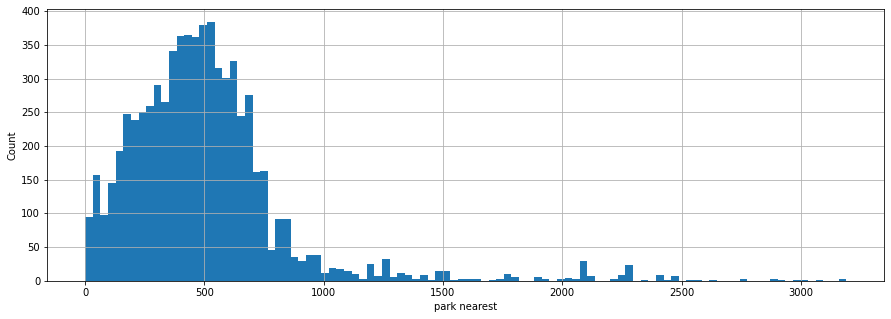

In [52]:
data['parks_nearest'].hist(figsize=(15,5), bins = 100);

plt.xlabel('park nearest')
plt.ylabel('Count')
plt.show()

Распредение нормальное.Большее кол-во предложений находится рядом с парками в диапазоне до 70 метров от квартиры.

- ДЕНЬ НЕДЕЛИ

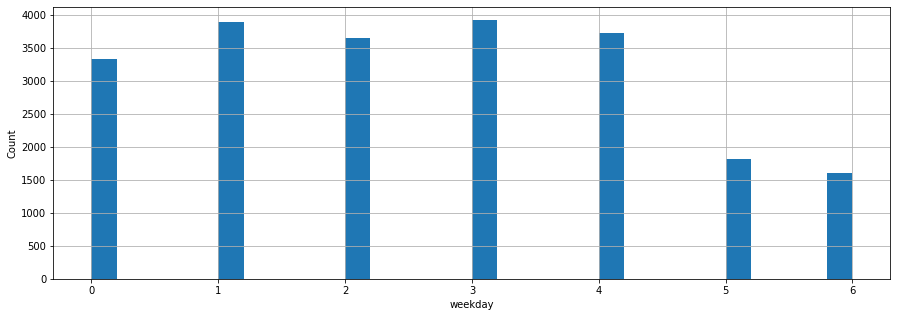

In [53]:
data['weekday'].hist(figsize=(15,5), bins = 30);

plt.xlabel('weekday')
plt.ylabel('Count')
plt.show()

Наблюдение:публикации объявлений происходит в основном в будние дни 

- МЕСЯЦ

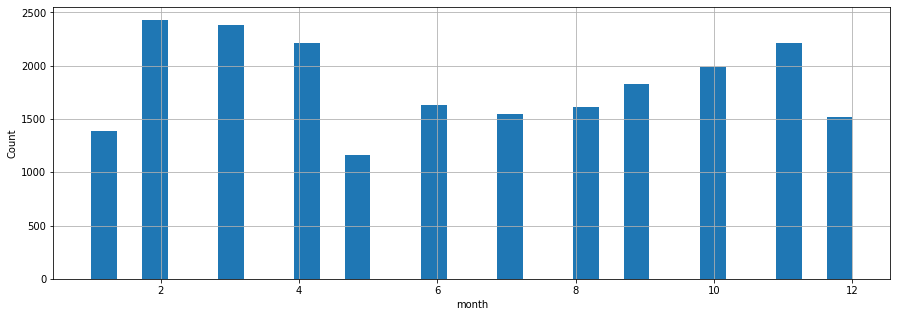

In [54]:
data['month'].hist(figsize=(15,5), bins = 30);

plt.xlabel('month')
plt.ylabel('Count')
plt.show()

Лучшим для совершения сделок с недвижимостью считается деловой сезон, который длится с сентября по май. Внутри него наиболее удачным временем считаются весна и осень. В этот момент жилье продается и покупается интенсивней, что видно на гистограмме. Декабрь и январь выбиваются из праздников, когда деловая активность снижается. Лето считается сезоном отпусков.

### Изучим скорость продаж

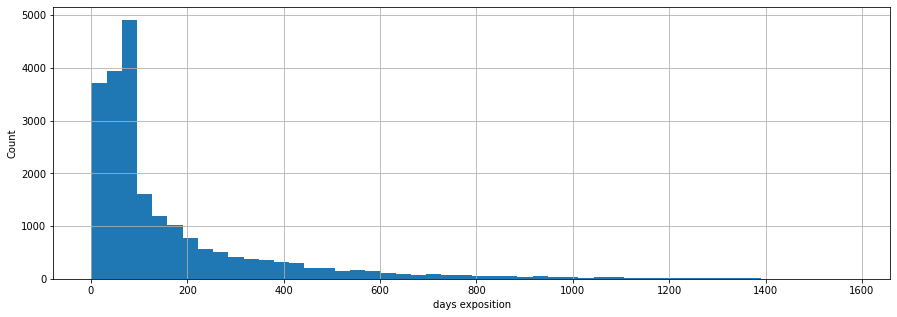

In [55]:
data['days_exposition'].hist(figsize=(15,5), bins = 50);
data['days_exposition'].describe()

plt.xlabel('days exposition')
plt.ylabel('Count')
plt.show()


Наблюдение:медианное время продаж 95 дней. Быстрыми продажами можно считать дни входящие в 25 квантиль. Долгими можно считать за 75 квантилем, но также есть очень длительнные прожади вплоть до 1580 дней.Возможно это зависит от качества недвижимости,конкретного города/поселка,удаленности от центра.

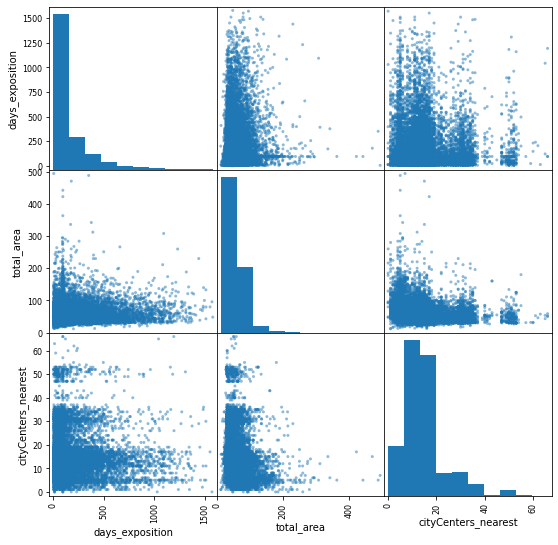

In [56]:
data_exposition = data['days_exposition']
data_total = data['total_area']
data_centr = data['cityCenters_nearest']
data_matrix = pd.DataFrame({'days_exposition':data_exposition,
                      'total_area':data_total,
                      'cityCenters_nearest':data_centr})
pd.plotting.scatter_matrix(data_matrix,figsize=(9, 9));

Применив матрицу диаграмм рассеяния с общей площадью,дней до продажи и удаленность от ценрта, видно зависимость, что чем дальше от центра тем дольше продажа,также площадь до 100кв продается быстрее.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

- ОБЩАЯ ПЛОЩАДЬ

0.7170432265238859

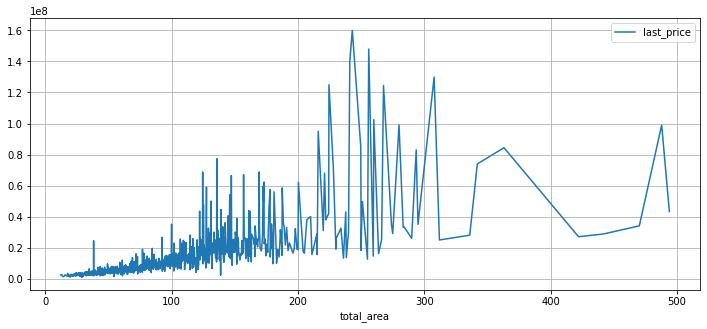

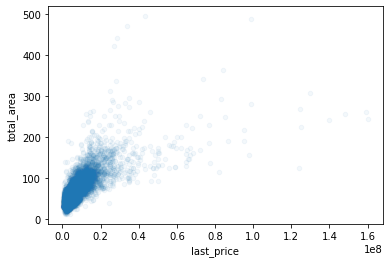

In [57]:
data.pivot_table(index='total_area', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5));
data.plot(x='last_price', y='total_area',kind='scatter',alpha=0.05);
data['last_price'].corr(data['total_area'])

Общая площадь напрямую влияет на стоимость недвижимости.
Коэффициент пирсона составляет 0.7, что свидетельствует о высокой корреляции.

- ЖИЛАЯ ПЛОЩАДЬ

0.5725334304138366

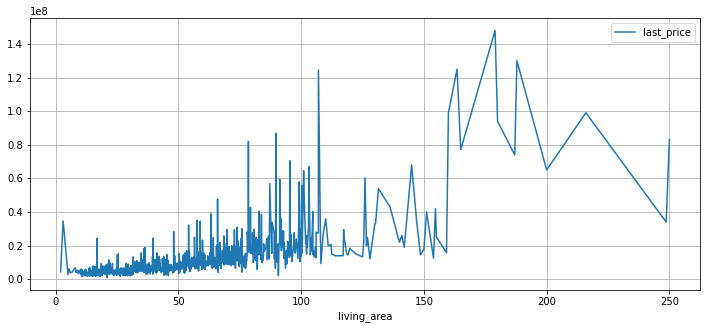

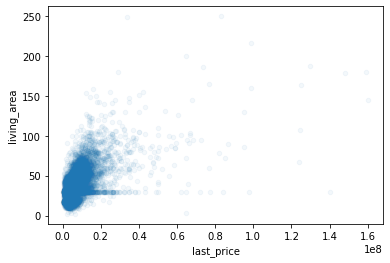

In [58]:
data.pivot_table(index='living_area', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5));
data.plot(x='last_price', y='living_area',kind='scatter',alpha=0.05);
data['last_price'].corr(data['living_area'])

Имеет влияние на цену,но корреляция уже меньше.
Коэффициент пирсона составляет 0.57, что свидетельствует о средней корреляции.

0.509904860568942

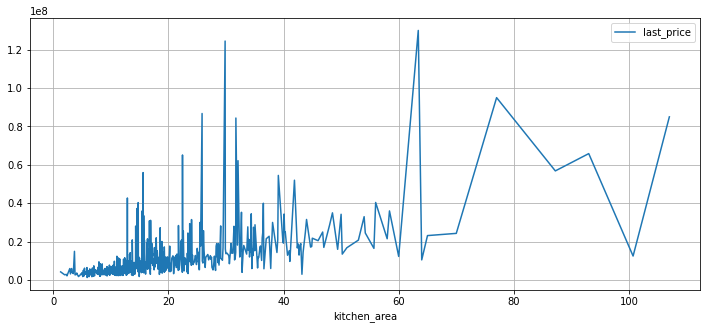

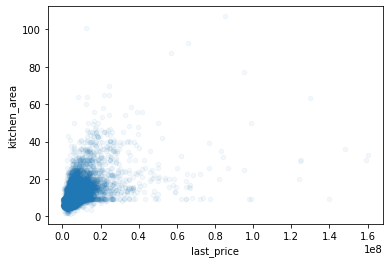

In [59]:
data.pivot_table(index='kitchen_area', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5));
data.plot(x='last_price', y='kitchen_area',kind='scatter',alpha=0.05);
data['last_price'].corr(data['kitchen_area'])

как и жилая площадь влияние на цену меньше чем общая площадь.
Коэффициент пирсона составляет 0.5, что свидетельствует о средней корреляции.

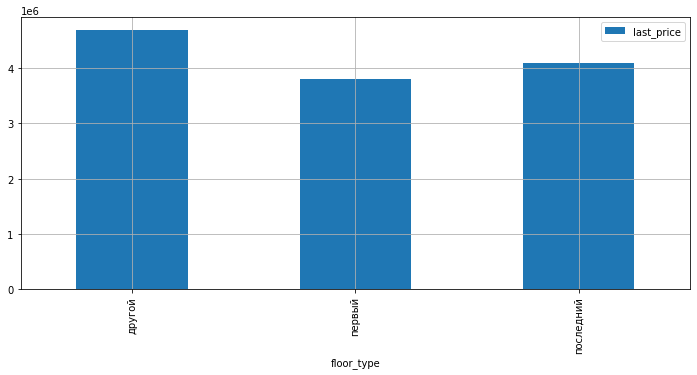

In [60]:
data.pivot_table(index='floor_type', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5),kind='bar');

Этаж не сильно влияет на цену

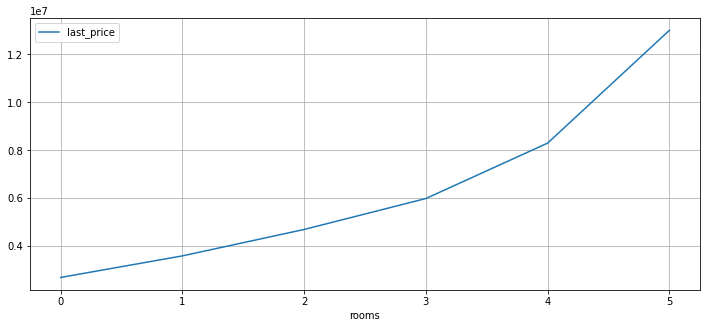

In [61]:
data.pivot_table(index='rooms', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5));

А вот кол-во комнат влияет на цену значительно

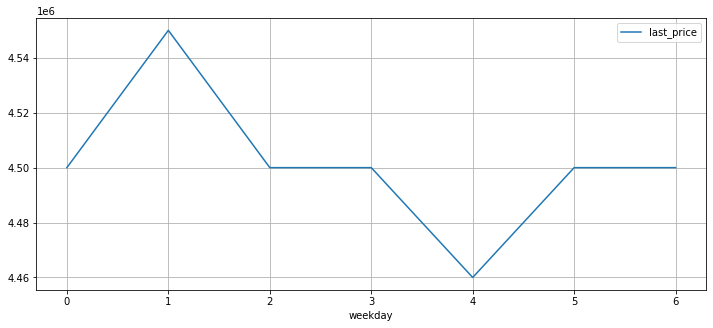

In [62]:
data.pivot_table(index='weekday', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5));

более высокие цены устанавливают в понедельник и вторник.

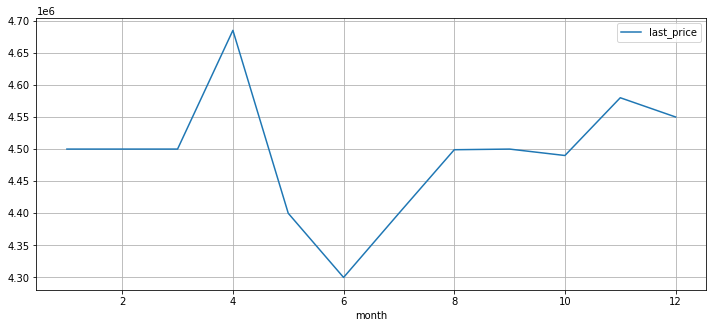

In [63]:
data.pivot_table(index='month', values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5));

цены в весенние и осенние месяцы самые выскоие. Как и описано ранее влияет сезонность.

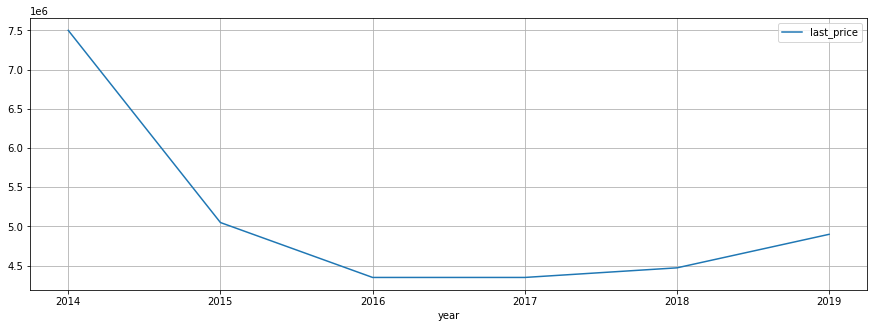

In [64]:
data.pivot_table(index='year', values='last_price',aggfunc='median').plot(grid=True, figsize=(15, 5));

После кризиса 2014 года цены на недвижимость упали и невосстаноавливаются.Здесь проблема связана с нестабильностью экономики,ростом курса валюты,сложностями в прогнозировани и падение доходов населения.Что интересно динамика за кв метр растет с 2017 года в отличие от цен за всю площадь.Интресено посмотреть на предлагаемую площадь по годам, возможно идет снижение площади, но цена растет.Так и есть предлагаемая площадь падает начиная с 2014 года а цена за кв метр растет.

После кризиса 2014 года цены на недвижимость упали и невосстаноавливаются.Здесь проблема связана с нестабильностью экономики,ростом курса валюты,сложностями в прогнозировани и падение доходов населения.

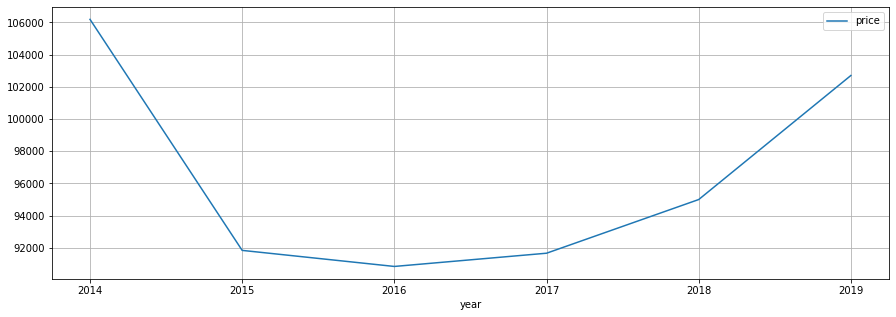

In [65]:
data.pivot_table(index='year', values='price',aggfunc='median').plot(grid=True, figsize=(15, 5));

Что интересно динамика за кв метр растет с 2017 года в отличие от цен за всю площадь.Интресено посмотреть на предлагаемую площадь по годам, возможно идет снижение площади, но цена растет.

In [66]:
data['total_area'].describe()

count    21903.000000
mean        56.587957
std         26.744714
min         12.000000
25%         39.210000
50%         50.000000
75%         66.000000
max        494.100000
Name: total_area, dtype: float64

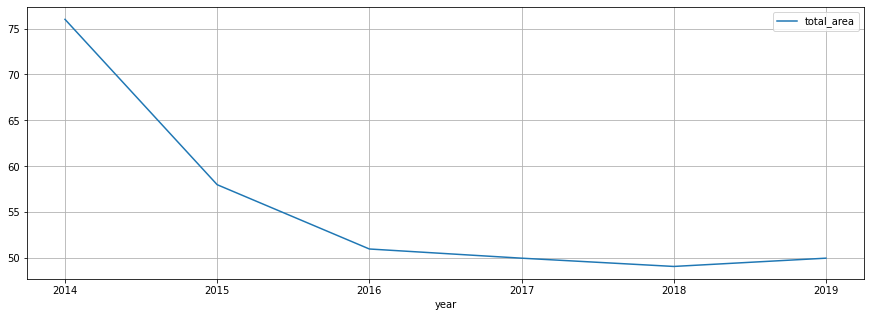

In [67]:
data.pivot_table(index='year', values='total_area',aggfunc='median').\
plot(grid=True, figsize=(15, 5));

Так и есть предлагаемая площадь падает начиная с 2014 года а цена за кв метр растет.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

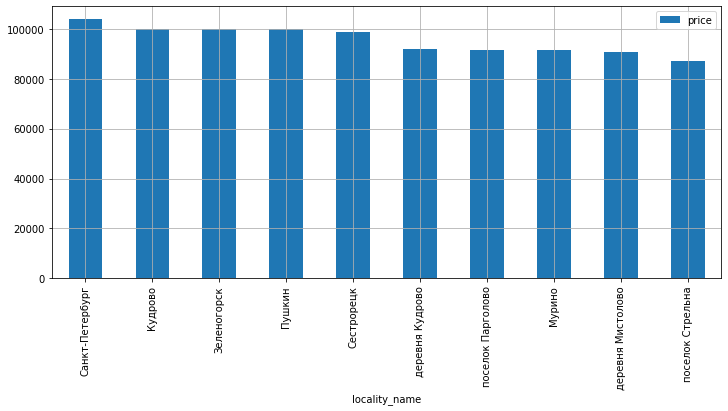

In [68]:
popular_ten = data.groupby('locality_name')['last_price'].count().sort_values(ascending=False)
one_meter = data.query('locality_name in @popular_ten.index')\
.pivot_table(index='locality_name', values='price', aggfunc="median") \
.sort_values(by='price',ascending=False).head(10).plot(grid=True, figsize=(12, 5),kind='bar')


(0.0, 200000.0)

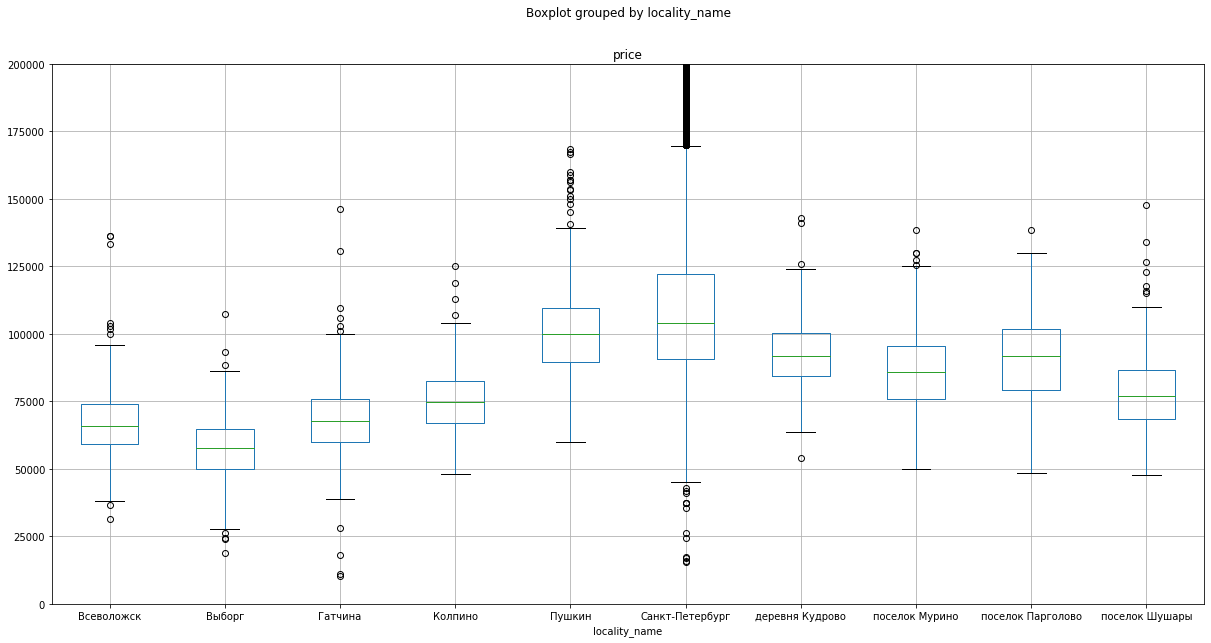

In [69]:
# Код ревьюера

ax = (data
    .query('locality_name in @popular_ten.head(10).index')
    .boxplot('price', by='locality_name', figsize=(20, 10))
)
ax.set_ylim(0, 200000)

Цены в городах выше чем в деревнях и поселках, что логично.

### Cредняя цена каждого километра.

,cityCenters_nearest,price_per_km
0,1.0,163817.60
1,2.0,60497.62
2,3.0,33541.25
3,4.0,27088.76
4,5.0,24515.59
5,6.0,19319.55
6,7.0,19074.76
7,8.0,10333.49
8,9.0,7378.01
9,10.0,6286.23


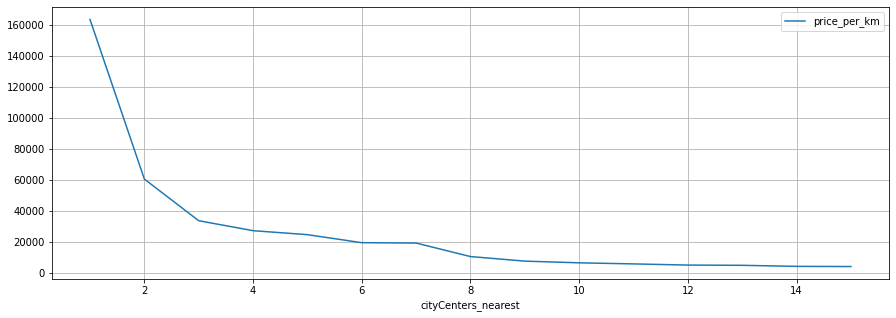

In [70]:
dataSPB = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest > 0').copy()
dataSPB['price_per_km'] = round(((dataSPB['last_price'] / dataSPB['cityCenters_nearest']) / 100),2)
dataSPB_pivot = dataSPB.pivot_table(index='cityCenters_nearest', values='price_per_km', aggfunc="mean").head(15)
dataSPB_reset = round(dataSPB_pivot.reset_index(),2)

dataSPB_reset.plot(x='cityCenters_nearest', y='price_per_km',\
                   kind='line',figsize=(15,5),grid=True);
dataSPB_reset



Цена сокращается по мере удаления от центра города. Цена значительно сокращается на первых трех километрах. в двух километрах цена сокращается в 2.5 раза с 163817 до 60497, далее на 3-ем километре в два раза до 33541. Потом динамика земедляется до 8 километра, там снова скачок почти в два раза.Данная территория уже местами находится за КАДом(условно границей города), что и обуславливает данное снижение.

### Общий вывод

В этом проекте выполнялся анализ данных на основе данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

Основыне данные для анализа:

- расстояние до ближайшего аэропорта в метрах (м)
- число балконов
- высота потолков (м)
- расстояние до центра города (м)
- сколько дней было размещено объявление (от публикации до снятия)
- дата публикации
- этаж
- всего этажей в доме
- апартаменты (булев тип)
- площадь кухни в квадратных метрах (м²)
- цена на момент снятия с публикации
- жилая площадь в квадратных метрах(м²)
- название населённого пункта
- свободная планировка (булев тип)
- число парков в радиусе 3 км
- расстояние до ближайшего парка (м)
- число водоёмов в радиусе 3 км
- расстояние до ближайшего водоёма (м)
- число комнат
- квартира-студия (булев тип)
- площадь квартиры в квадратных метрах (м²)
- число фотографий квартиры в объявлении

Основые задачи, которые решишались в этом проекте и их результаты:

- Очистить данные от дубликатов, заполнить пропуски
 - Было обнаружено большое кол-во пропусков из 22 двух параметров 9 содержали пропуски больше 20%.
  В таких парметрах как "апартаменты" изменен тип данных на булево значение, "балконы" добалено значение 0 там,где балконы отсутствуют. Данные о парках,аэропортах,водоемах рядом остались без изменений так как на анализ данных они не сильно влияли.Данные по высоте потолков скорректированы на медианное значение в зависимости от места нахождения.
  
- Привести данные к нужным типам (с пояснением выбора типа)
 - Часть данных были скорректированы на целые значения с плавющей точки
- Убираем редкие и выбивающиеся значения. Описываем, какие особенности обнаружили

 - Большое кол-во выбросов "высота потолков".Данные могли быть внесены некорректно.Есть выброс равный 100м.Выброс был устранен.Другие выбросы составляли около 6% от всех значений. также были удалены.
  - В катеогрии "квартиры" удалены около 100 значений выборосв с большим кол-вом комнат,для выборки они не информативны.На рынке в основном представлены квартиры с площадью до 200 кв.метров и до 5 комнат.Квартиры от 6 комнат были удалены,так они представлены в меньшем объеме и помогут провести анализ
 - В категории "жилая площадь" есть выброс около 4000м. Убран только один самый выскоий выброс,остальные отслаись без изменений, так цена имеет при вязку к размеру площади, которую оставили без изменений
 
- Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра
 - Здесь итересно отметить, что лучшим для совершения сделок с недвижимостью считается деловой сезон, который длится с сентября по май. Внутри него наиболее удачным временем считаются весна и осень. В этот момент жилье продается и покупается интенсивней, что видно на гистограмме. Декабрь и январь выбиваются из праздников, когда деловая активность снижается. Лето считается сезоном отпусков.
- Анализируем:Какие факторы больше всего влияют на стоимость квартиры? Изучаем, зависит ли цена от квадратного метра, числа комнат. Изучаем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучаем зависимость от даты размещения: дня недели, месяца и года.
 - Здесь помимо очевидных факторов, которые напрямую влияют на цену такие как общая/жилая площадь, кол-во комнат стоит отметить, что после кризиса 2014 года полные цены на недвижимость упали и не восстаноавливаются.Здесь проблема связана с нестабильностью экономики,ростом курса валюты,сложностями в прогнозировани и падение доходов населения,но интересно что динамика за кв метр растет с 2017 года в отличие от цен за всю площадь,как выявило исследование идет снижение предлагаемой площади по годам, но цена за квадратный метр растет.Это тоже кризичные явления.
 
- Изучаем время продажи квартиры. Строим гистограмму. Считаем среднее и медиану. Описываем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
 - Медианное время продаж 95 дней. Быстрыми продажами можно считать дни входящие в 25 квантиль. Долгими можно считать за 75 квантилем, но также есть очень длительнные прожади вплоть до 1580 дней.Возможно это зависит от качества недвижимости,конкретного города/поселка,удаленности от центра.
 
- Изучаем квартиры в Санкт-Петербурге с помощью столбца locality_name и вычисляем среднюю цену каждого километра
 - Цена сокращается по мере удаления от центра города. Цена значительно сокращается на первых трех километрах. в двух километрах цена сокращается в 2.5 раза с 163817 до 60497, далее на 3-ем километре в два раза до 33541. Потом динамика земедляется до 8 километра, там снова скачок почти в два раза.Данная территория уже местами находится за КАДом(условно границей города), что и обуславливает данное снижение.
 
- Определить цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений,посчитать цену за км от центра Санкт-Петербурга.
 - Можно отметить, что цены распределны в 10 популярных населенных пунктах между 91553 и 99996 с медианным значением 99996
